Datasource: 
- https://corona.lmao.ninja/
- https://corona.lmao.ninja/v3/covid-19/all
- https://github.com/disease-sh/api

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

%matplotlib inline

In [2]:
url = 'https://corona.lmao.ninja/v3/covid-19/all'
r = requests.get(url)
j = r.json()
j

{'updated': 1627614034834,
 'cases': 197365402,
 'todayCases': 46132,
 'deaths': 4214617,
 'todayDeaths': 724,
 'recovered': 178517335,
 'todayRecovered': 25202,
 'active': 14633450,
 'critical': 87079,
 'casesPerOneMillion': 25320,
 'deathsPerOneMillion': 540.7,
 'tests': 2989782742,
 'testsPerOneMillion': 381329.31,
 'population': 7840421995,
 'oneCasePerPeople': 0,
 'oneDeathPerPeople': 0,
 'oneTestPerPeople': 0,
 'activePerOneMillion': 1866.41,
 'recoveredPerOneMillion': 22768.84,
 'criticalPerOneMillion': 11.11,
 'affectedCountries': 222}

In [3]:
type(j)

dict

In [4]:
j['cases']

197365402

In [5]:
j['deaths']

4214617

In [6]:
j['recovered']

178517335

In [7]:
j['updated']

1627614034834

In [8]:
type(j['updated'])
# unix timestamp

int

In [9]:
pd.datetime.fromtimestamp(1624347057).strftime('%Y-%m-%d %H:%M:%S')

<ipython-input-9-d932e3748b95>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.fromtimestamp(1624347057).strftime('%Y-%m-%d %H:%M:%S')


'2021-06-22 14:30:57'

In [10]:
j['updated'] // 1000

1627614034

In [11]:
pd.datetime.fromtimestamp(j['updated'] // 1000).strftime('%Y-%m-%d %H:%M:%S')

<ipython-input-11-8bdab65eaa38>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.fromtimestamp(j['updated'] // 1000).strftime('%Y-%m-%d %H:%M:%S')


'2021-07-30 10:00:34'

# Single country

In [12]:
country = 'Thailand'

url = f'https://corona.lmao.ninja/v3/covid-19/countries/{country}'
r = requests.get(url)
j = r.json()
j

{'updated': 1627614034932,
 'country': 'Thailand',
 'countryInfo': {'_id': 764,
  'iso2': 'TH',
  'iso3': 'THA',
  'lat': 15,
  'long': 100,
  'flag': 'https://disease.sh/assets/img/flags/th.png'},
 'cases': 578375,
 'todayCases': 17345,
 'deaths': 4679,
 'todayDeaths': 117,
 'recovered': 381170,
 'todayRecovered': 10678,
 'active': 192526,
 'critical': 4511,
 'casesPerOneMillion': 8264,
 'deathsPerOneMillion': 67,
 'tests': 8129670,
 'testsPerOneMillion': 116158,
 'population': 69988255,
 'continent': 'Asia',
 'oneCasePerPeople': 121,
 'oneDeathPerPeople': 14958,
 'oneTestPerPeople': 9,
 'activePerOneMillion': 2750.83,
 'recoveredPerOneMillion': 5446.2,
 'criticalPerOneMillion': 64.45}

In [13]:
type(j)

dict

In [14]:
j['cases']

578375

In [15]:
j['casesPerOneMillion']

8264

# All countries

In [16]:
url = 'https://corona.lmao.ninja/v3/covid-19/countries'
r = requests.get(url)
j = r.json()
j

[{'updated': 1627613434792,
  'country': 'Afghanistan',
  'countryInfo': {'_id': 4,
   'iso2': 'AF',
   'iso3': 'AFG',
   'lat': 33,
   'long': 65,
   'flag': 'https://disease.sh/assets/img/flags/af.png'},
  'cases': 146523,
  'todayCases': 0,
  'deaths': 6677,
  'todayDeaths': 0,
  'recovered': 96692,
  'todayRecovered': 0,
  'active': 43154,
  'critical': 1124,
  'casesPerOneMillion': 3675,
  'deathsPerOneMillion': 167,
  'tests': 701952,
  'testsPerOneMillion': 17607,
  'population': 39866683,
  'continent': 'Asia',
  'oneCasePerPeople': 272,
  'oneDeathPerPeople': 5971,
  'oneTestPerPeople': 57,
  'activePerOneMillion': 1082.46,
  'recoveredPerOneMillion': 2425.38,
  'criticalPerOneMillion': 28.19},
 {'updated': 1627613434800,
  'country': 'Albania',
  'countryInfo': {'_id': 8,
   'iso2': 'AL',
   'iso3': 'ALB',
   'lat': 41,
   'long': 20,
   'flag': 'https://disease.sh/assets/img/flags/al.png'},
  'cases': 132999,
  'todayCases': 0,
  'deaths': 2457,
  'todayDeaths': 0,
  'recove

In [17]:
type(j)

list

In [18]:
df = pd.DataFrame(j)
df

,updated,country,countryInfo,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,...,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,1627613434792,Afghanistan,"{'_id': 4, 'iso2': 'AF', 'iso3': 'AFG', 'lat':...",146523,0,6677,0,96692,0,43154,...,701952,17607,39866683,Asia,272,5971,57,1082.46,2425.38,28.19
1,1627613434800,Albania,"{'_id': 8, 'iso2': 'AL', 'iso3': 'ALB', 'lat':...",132999,0,2457,0,130187,0,355,...,916777,318944,2874417,Europe,22,1170,3,123.50,45291.62,1.04
2,1627613434785,Algeria,"{'_id': 12, 'iso2': 'DZ', 'iso3': 'DZA', 'lat'...",168668,0,4189,0,113707,0,50772,...,230861,5165,44699453,Africa,265,10671,194,1135.85,2543.81,0.83
3,1627613434870,Andorra,"{'_id': 20, 'iso2': 'AD', 'iso3': 'AND', 'lat'...",14655,0,127,0,14180,0,348,...,193595,2501292,77398,Europe,5,609,0,4496.24,183208.87,0.00
4,1627613434835,Angola,"{'_id': 24, 'iso2': 'AO', 'iso3': 'AGO', 'lat'...",42486,0,1003,0,36025,0,5458,...,681443,20067,33958209,Africa,799,33857,50,160.73,1060.86,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,1627613434932,Wallis and Futuna,"{'_id': 876, 'iso2': 'WF', 'iso3': 'WLF', 'lat...",445,0,7,0,438,0,0,...,20508,1859799,11027,Australia-Oceania,25,1575,1,0.00,39720.69,0.00
218,1627613434947,Western Sahara,"{'_id': 732, 'iso2': 'EH', 'iso3': 'ESH', 'lat...",10,0,1,0,8,0,1,...,0,0,613050,Africa,61305,613050,0,1.63,13.05,0.00
219,1627613434896,Yemen,"{'_id': 887, 'iso2': 'YE', 'iso3': 'YEM', 'lat...",7042,0,1374,0,4171,0,1497,...,147809,4842,30529120,Asia,4335,22219,207,49.04,136.62,0.75
220,1627613434782,Zambia,"{'_id': 894, 'iso2': 'ZM', 'iso3': 'ZMB', 'lat...",194140,0,3355,0,185210,0,5575,...,2076147,109650,18934268,Africa,98,5644,9,294.44,9781.74,24.72


In [19]:
df.drop(['countryInfo', 'updated'], axis='columns', inplace=True)
df

,country,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,casesPerOneMillion,...,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,Afghanistan,146523,0,6677,0,96692,0,43154,1124,3675,...,701952,17607,39866683,Asia,272,5971,57,1082.46,2425.38,28.19
1,Albania,132999,0,2457,0,130187,0,355,3,46270,...,916777,318944,2874417,Europe,22,1170,3,123.50,45291.62,1.04
2,Algeria,168668,0,4189,0,113707,0,50772,37,3773,...,230861,5165,44699453,Africa,265,10671,194,1135.85,2543.81,0.83
3,Andorra,14655,0,127,0,14180,0,348,0,189346,...,193595,2501292,77398,Europe,5,609,0,4496.24,183208.87,0.00
4,Angola,42486,0,1003,0,36025,0,5458,8,1251,...,681443,20067,33958209,Africa,799,33857,50,160.73,1060.86,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Wallis and Futuna,445,0,7,0,438,0,0,0,40355,...,20508,1859799,11027,Australia-Oceania,25,1575,1,0.00,39720.69,0.00
218,Western Sahara,10,0,1,0,8,0,1,0,16,...,0,0,613050,Africa,61305,613050,0,1.63,13.05,0.00
219,Yemen,7042,0,1374,0,4171,0,1497,23,231,...,147809,4842,30529120,Asia,4335,22219,207,49.04,136.62,0.75
220,Zambia,194140,0,3355,0,185210,0,5575,468,10253,...,2076147,109650,18934268,Africa,98,5644,9,294.44,9781.74,24.72


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 222 non-null    object 
 1   cases                   222 non-null    int64  
 2   todayCases              222 non-null    int64  
 3   deaths                  222 non-null    int64  
 4   todayDeaths             222 non-null    int64  
 5   recovered               222 non-null    int64  
 6   todayRecovered          222 non-null    int64  
 7   active                  222 non-null    int64  
 8   critical                222 non-null    int64  
 9   casesPerOneMillion      222 non-null    int64  
 10  deathsPerOneMillion     222 non-null    float64
 11  tests                   222 non-null    int64  
 12  testsPerOneMillion      222 non-null    int64  
 13  population              222 non-null    int64  
 14  continent               222 non-null    ob

In [21]:
df[df.country=='Thailand']

,country,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,casesPerOneMillion,...,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
200,Thailand,578375,17345,4679,117,381170,10678,192526,4511,8264,...,8129670,116158,69988255,Asia,121,14958,9,2750.83,5446.2,64.45


In [22]:
dq = df[df['country'].str.contains('Thailand|Malaysia|Singapore|Indonesia|Cambodia')]
dq

,country,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,casesPerOneMillion,...,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
33,Cambodia,75917,0,1350,0,68386,0,6181,0,4474,...,1793549,105707,16967121,Asia,223,12568,9,364.29,4030.50,0.00
94,Indonesia,3331206,0,90552,0,2686170,0,554484,0,12042,...,25807257,93292,276627864,Asia,83,3055,11,2004.44,9710.41,0.00
122,Malaysia,1078646,0,8725,0,890742,0,179179,1043,32875,...,17848171,543972,32810850,Asia,30,3761,2,5460.97,27147.79,31.79
180,Singapore,64722,0,37,0,62679,0,2006,3,10970,...,15726438,2665610,5899752,Asia,91,159453,0,340.01,10624.01,0.51
200,Thailand,578375,17345,4679,117,381170,10678,192526,4511,8264,...,8129670,116158,69988255,Asia,121,14958,9,2750.83,5446.20,64.45


In [23]:
colors = ['.8' if c != 'Thailand' else 'salmon' for c in dq['country']]
colors

['.8', '.8', '.8', '.8', 'salmon']

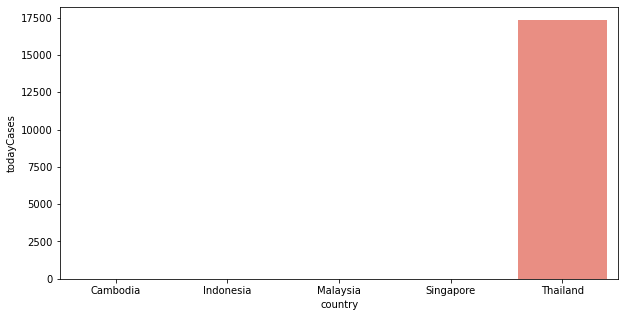

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=dq, x='country', y='todayCases', palette=colors);

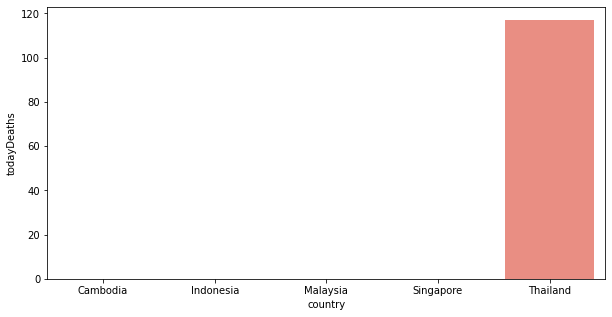

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data=dq, x='country', y='todayDeaths', palette=colors);

In [26]:
# df.to_excel('covid_latest.xlsx', index=False)